## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [134]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import datetime
datetime.datetime.strptime

# SciKitLearn 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-notebook')# Your code here - remember to use markdown cells for comments as well!

In [135]:
df = pd.read_csv('./data/kc_house_data.csv', parse_dates=['date']) # specify index_col=0 to avoid creating an "Unnamed: 0" column.

# specify parse date to avoid object dtype for dates

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [136]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

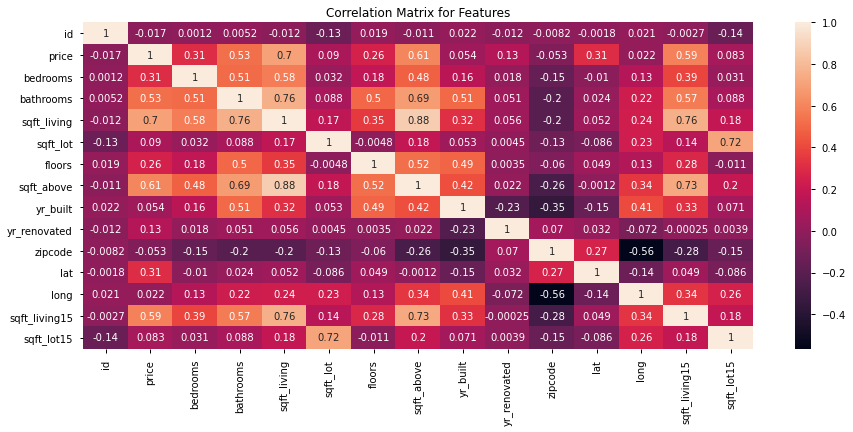

In [138]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

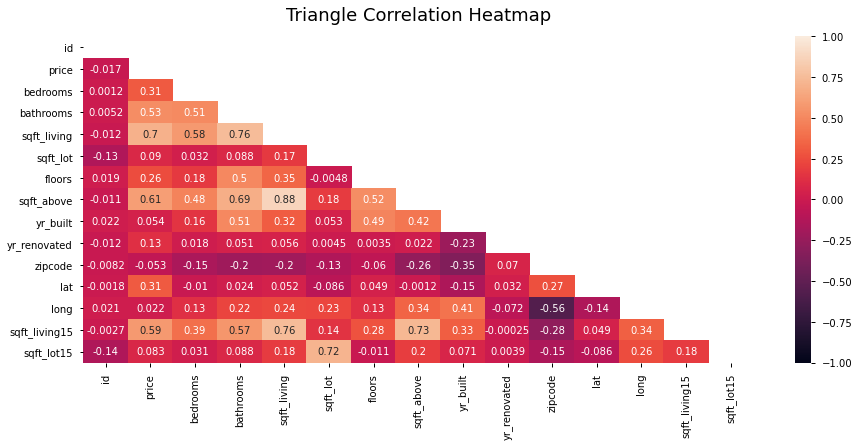

In [139]:
plt.figure(figsize=(15,6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

There is a high correlation between sqft_living and price.

There doesn not appear to be any correlation between yr_renovated and price. This is because it's connecting the year it was rennovated and the price. We should instead look at the connection of if a home has been rennovated, does it have a higher price.

C:\Users\Kev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


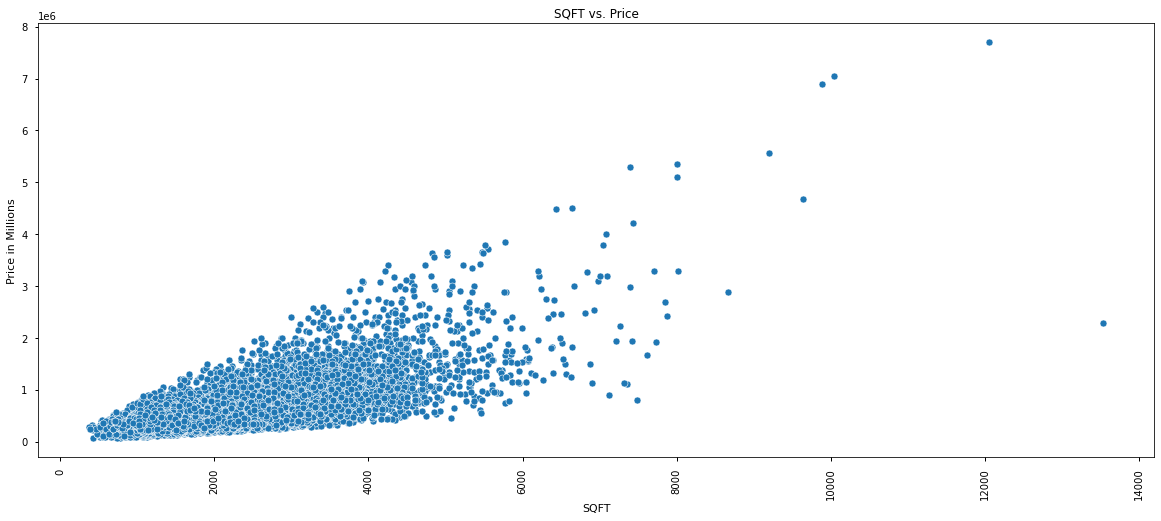

<Figure size 576x396 with 0 Axes>

In [140]:
#plot 'sqft' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.scatterplot(df['sqft_living'], df['price'])
plt.title('SQFT vs. Price')
plt.xlabel('SQFT')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data/zipcode_vs_price_scatter')

In [141]:
columns = ['sqft_living', 'bathrooms', 'bedrooms']
X = df[columns]
y = df['price']
baseline_model = sm.add_constant(X)
baseline_results = sm.OLS(y, baseline_model).fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:25   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to determine if a home has been renovated or not, we are creating a column called recent_reno that shows if a home has been renovated in the last 15 years.

In [142]:
df['yr_renovated'].fillna(0, inplace=True)

In [143]:
#creating reno column
# df['renovated'] = 0
# df.loc[kc_house_df['yr_renovated'] > 1, 'renovated'] = 1

#creating recent reno column
df['recent_reno'] = 0
df.loc[df['yr_renovated'] > 2000, 'recent_reno'] = 1

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [145]:
df['recent_reno'].value_counts()

0    21247
1      350
Name: recent_reno, dtype: int64

Dropping the following features that we aren't interesed in observing with regards to renovations

In [146]:
df.drop(columns= ['waterfront', 'view', 'sqft_above','sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [147]:
df['grade'] = df['grade'].str.split().apply(lambda x: x[0])
df['grade'] = df['grade'].astype(int)

In [148]:
df['condition'] = df['condition'].astype('category')

In [149]:
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

In [150]:
df['condition'].cat.codes

0        2
1        2
2        2
3        4
4        2
        ..
21592    2
21593    2
21594    2
21595    2
21596    2
Length: 21597, dtype: int8

In [151]:
ord_cat_selector = ['condition']
cat_subset = df[ord_cat_selector]
cat_subset

,condition
0,Average
1,Average
2,Average
3,Very Good
4,Average
...,...
21592,Average
21593,Average
21594,Average
21595,Average


In [152]:
cat_subset['condition'].unique()

['Average', 'Very Good', 'Good', 'Poor', 'Fair']
Categories (5, object): ['Average', 'Very Good', 'Good', 'Poor', 'Fair']

In [153]:
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 

In [154]:
o_enc = OrdinalEncoder(categories = [condition_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good']])

In [155]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition
0,2.0
1,2.0
2,2.0
3,4.0
4,2.0
...,...
21592,2.0
21593,2.0
21594,2.0
21595,2.0


In [156]:
df['condition_code'] = X_subset

In [157]:
df.drop_duplicates(subset='id', inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21420 non-null  int64         
 1   date            21420 non-null  datetime64[ns]
 2   price           21420 non-null  float64       
 3   bedrooms        21420 non-null  int64         
 4   bathrooms       21420 non-null  float64       
 5   sqft_living     21420 non-null  int64         
 6   sqft_lot        21420 non-null  int64         
 7   floors          21420 non-null  float64       
 8   condition       21420 non-null  category      
 9   grade           21420 non-null  int32         
 10  yr_built        21420 non-null  int64         
 11  yr_renovated    21420 non-null  float64       
 12  zipcode         21420 non-null  int64         
 13  recent_reno     21420 non-null  int64         
 14  condition_code  21420 non-null  float64       
dtypes:

In [159]:
df['renovation_cost'] = df['sqft_living'] * 45
#average cost of a renovation is between $15-60 per squarefoot
#using the avg of $45 per squarefoot cost we can calculate the cost of a full house renovation

In [160]:
#sqft_filter = df[(df['sqft_living'] > 1800) & (df['sqft_living'] < 2800)]
#sqft_filter

In [161]:
#price_range = df[(df['price'] > 250000) & (df['price'] < 1000000)]

In [162]:
#price_range.groupby('recent_reno').agg(['mean'])

In [163]:
#df = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)] urban city limits

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21420 non-null  int64         
 1   date             21420 non-null  datetime64[ns]
 2   price            21420 non-null  float64       
 3   bedrooms         21420 non-null  int64         
 4   bathrooms        21420 non-null  float64       
 5   sqft_living      21420 non-null  int64         
 6   sqft_lot         21420 non-null  int64         
 7   floors           21420 non-null  float64       
 8   condition        21420 non-null  category      
 9   grade            21420 non-null  int32         
 10  yr_built         21420 non-null  int64         
 11  yr_renovated     21420 non-null  float64       
 12  zipcode          21420 non-null  int64         
 13  recent_reno      21420 non-null  int64         
 14  condition_code   21420 non-null  float

In [165]:
columns = ['sqft_living', 'bathrooms', 'bedrooms','condition_code','renovation_cost','sqft_lot']
X = df[columns]
y = df['price']
baseline_model = sm.add_constant(X)
baseline_results = sm.OLS(y, baseline_model).fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4580.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:25   Log-Likelihood:            -2.9712e+05
No. Observations:               21420   AIC:                         5.942e+05
Df Residuals:                   21414   BIC:                         5.943e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.761e+04   9678.145     -4.919      0.000   -6.66e+04   -2.86e+04
sqft_living         0.1549      0.002    100.102      0.000       0.152       0.158
bathrooms        1.599e+04   3547.912      4.506      0.000    9032.636    2.29e+04
bedrooms        -6.466e+04   2359.169    -27.410      0.000   -6.93e+04      -6e+04
condition_code   5.166e+04   2728.362     18.933      0.000    4.63e+04     5.7e+04
renovation_cost     6.9720      0.070    100.094      0.000       6.835       7.109
sqft_lot           -0.3808      0.043     -8.868      0.000      -0.465      -0.297
==============================================================================
Omnibus:                    14258.349   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486803.358
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      25.712   Cond. No.                     1.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [166]:
columns = ['sqft_living', 'bathrooms', 'bedrooms','condition_code','renovation_cost','sqft_lot']
X = df[columns]
y = df['price']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [168]:
print(X_train.shape, X_test.shape)

(16065, 6) (5355, 6)


In [169]:
dm_reg = DummyRegressor(strategy='median')

In [170]:
dummy_model = dm_reg.fit(X_train, y_train)

In [171]:
dummy_model.score(X_test, y_test)

-0.06181675581636448

In [172]:
lr = LinearRegression()
lr_fit = lr.fit(np.array(X_train['sqft_living']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
simple_train_score = lr_fit.score(np.array(X_train['sqft_living']).reshape(-1,1), np.array(y_train).reshape(-1,1))
simple_test_score = lr_fit.score(np.array(X_test['sqft_living']).reshape(-1,1), np.array(y_test).reshape(-1,1))

In [173]:
print(simple_train_score, simple_test_score)

0.4945071863710663 0.4862801961574208


In [174]:
lr = LinearRegression()
lr_fit = lr.fit(np.array(X_train['condition_code']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
simple_train_score = lr_fit.score(np.array(X_train['condition_code']).reshape(-1,1), np.array(y_train).reshape(-1,1))
simple_test_score = lr_fit.score(np.array(X_test['condition_code']).reshape(-1,1), np.array(y_test).reshape(-1,1))

In [175]:
print(simple_train_score, simple_test_score)

0.001087602715000635 0.0015171117602930106


In [176]:
lr = LinearRegression()
lr_fit = lr.fit(np.array(X_train['sqft_lot']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
simple_train_score = lr_fit.score(np.array(X_train['sqft_lot']).reshape(-1,1), np.array(y_train).reshape(-1,1))
simple_test_score = lr_fit.score(np.array(X_test['sqft_lot']).reshape(-1,1), np.array(y_test).reshape(-1,1))

In [177]:
print(simple_train_score, simple_test_score)

0.00890467389778793 0.003707028522622502
